<a href="https://colab.research.google.com/github/Gio-Choi/Stock_Regime_Analysis/blob/main/3mos_FSI_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Random Forest Model



In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
pd.set_option('display.max_columns', None)

In [42]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/FSI_Analysis/FSI_Macro.csv')

In [43]:
df = df.drop(columns = ['Unnamed: 0','Date','^GSPC','S&P_UD','MAX','CMAX','Yt','Rank','FSI','FSI_pct'])
df

,VIXCLS,CPIAUCSL,M2SL,FEDFUNDS,T10Y2Y,AAA,UNRATE,PCUOMFGOMFG,USPHCI,IQ,FSI_UD
0,14.09,193.700,6455.9,2.79,0.71,5.33,5.2,149.6,93.93,106.9,0.0
1,15.12,193.600,6473.3,3.00,0.57,5.15,5.1,149.4,94.18,106.7,0.0
2,12.36,193.700,6505.8,3.04,0.41,4.96,5.0,149.6,94.46,106.7,1.0
3,11.40,194.900,6537.4,3.26,0.30,5.06,5.0,151.0,94.73,106.8,0.0
4,12.08,196.100,6570.2,3.50,0.28,5.09,4.9,151.8,94.98,106.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...
184,24.28,259.580,18357.4,0.10,0.45,2.25,8.4,193.0,121.22,122.1,1.0
185,26.12,260.190,18575.2,0.09,0.55,2.31,7.9,192.9,121.97,122.8,0.0
186,26.70,260.352,18735.7,0.09,0.54,2.35,6.9,193.7,122.93,123.0,0.0
187,37.13,260.721,18969.8,0.09,0.71,2.30,6.7,194.5,123.40,124.0,0.0


In [44]:
names = df.columns.tolist()
names.pop()
names

['VIXCLS',
 'CPIAUCSL',
 'M2SL',
 'FEDFUNDS',
 'T10Y2Y',
 'AAA',
 'UNRATE',
 'PCUOMFGOMFG',
 'USPHCI',
 'IQ']

In [45]:
new_df = pd.DataFrame()

# Iterate over each row in the original dataframe
for i in range(2, len(df)):
    # Get the current y value
    y = df.iloc[i][-1]

    # Get the x features for the past 3 time steps
    x_features = df.iloc[i-2:i+1, :-1].values.flatten()

    # Create a dictionary with the data for the current row
    row_data = {'y': y}
    for j, feature in enumerate(x_features):
      m = j%10
      name = names[m]
      row_data[f'{name}{(j//10)+1}'] = feature

    # Append the row to the new dataframe
    new_df = new_df.append(row_data, ignore_index=True)

<ipython-input-45-1266fd561c90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row_data, ignore_index=True)
<ipython-input-45-1266fd561c90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row_data, ignore_index=True)
<ipython-input-45-1266fd561c90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row_data, ignore_index=True)
<ipython-input-45-1266fd561c90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row_data, ignore_index=True)
<ipython-input-45-1266fd561c90>:19: FutureWarning: The frame.append method is deprecated and will be removed

In [46]:
new_df

,y,VIXCLS1,CPIAUCSL1,M2SL1,FEDFUNDS1,T10Y2Y1,AAA1,UNRATE1,PCUOMFGOMFG1,USPHCI1,IQ1,VIXCLS2,CPIAUCSL2,M2SL2,FEDFUNDS2,T10Y2Y2,AAA2,UNRATE2,PCUOMFGOMFG2,USPHCI2,IQ2,VIXCLS3,CPIAUCSL3,M2SL3,FEDFUNDS3,T10Y2Y3,AAA3,UNRATE3,PCUOMFGOMFG3,USPHCI3,IQ3
0,1.0,14.09,193.700,6455.9,2.79,0.71,5.33,5.2,149.6,93.93,106.9,15.12,193.600,6473.3,3.00,0.57,5.15,5.1,149.4,94.18,106.7,12.36,193.700,6505.8,3.04,0.41,4.96,5.0,149.6,94.46,106.7
1,0.0,15.12,193.600,6473.3,3.00,0.57,5.15,5.1,149.4,94.18,106.7,12.36,193.700,6505.8,3.04,0.41,4.96,5.0,149.6,94.46,106.7,11.40,194.900,6537.4,3.26,0.30,5.06,5.0,151.0,94.73,106.8
2,1.0,12.36,193.700,6505.8,3.04,0.41,4.96,5.0,149.6,94.46,106.7,11.40,194.900,6537.4,3.26,0.30,5.06,5.0,151.0,94.73,106.8,12.08,196.100,6570.2,3.50,0.28,5.09,4.9,151.8,94.98,106.6
3,0.0,11.40,194.900,6537.4,3.26,0.30,5.06,5.0,151.0,94.73,106.8,12.08,196.100,6570.2,3.50,0.28,5.09,4.9,151.8,94.98,106.6,13.15,198.800,6604.3,3.62,0.30,5.13,5.0,154.2,95.12,107.5
4,1.0,12.08,196.100,6570.2,3.50,0.28,5.09,4.9,151.8,94.98,106.6,13.15,198.800,6604.3,3.62,0.30,5.13,5.0,154.2,95.12,107.5,12.46,199.100,6638.6,3.78,0.18,5.35,5.0,156.6,95.33,108.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1.0,28.23,257.217,18129.3,0.08,0.52,2.44,11.0,190.2,119.46,120.3,28.62,258.543,18277.8,0.09,0.52,2.14,10.2,192.3,119.79,121.5,24.28,259.580,18357.4,0.10,0.45,2.25,8.4,193.0,121.22,122.1
183,0.0,28.62,258.543,18277.8,0.09,0.52,2.14,10.2,192.3,119.79,121.5,24.28,259.580,18357.4,0.10,0.45,2.25,8.4,193.0,121.22,122.1,26.12,260.190,18575.2,0.09,0.55,2.31,7.9,192.9,121.97,122.8
184,0.0,24.28,259.580,18357.4,0.10,0.45,2.25,8.4,193.0,121.22,122.1,26.12,260.190,18575.2,0.09,0.55,2.31,7.9,192.9,121.97,122.8,26.70,260.352,18735.7,0.09,0.54,2.35,6.9,193.7,122.93,123.0
185,0.0,26.12,260.190,18575.2,0.09,0.55,2.31,7.9,192.9,121.97,122.8,26.70,260.352,18735.7,0.09,0.54,2.35,6.9,193.7,122.93,123.0,37.13,260.721,18969.8,0.09,0.71,2.30,6.7,194.5,123.40,124.0


In [47]:
df = new_df

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [49]:
dataset = df.values

In [50]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(dataset, test_size = 0.2, random_state = 46)
print("훈련 데이터 개수 : ", len(train_data))
print("테스트 데이터 개수 : ", len(test_data))

훈련 데이터 개수 :  149
테스트 데이터 개수 :  38


In [51]:
# split into input (X) and output (Y) variables
X_train = train_data[:,1:31].astype(float)
Y_train_raw = train_data[:,0]

In [52]:
# Train Set Y variable Labeling
encoder = LabelEncoder()
encoder.fit(Y_train_raw)
Y_train = encoder.transform(Y_train_raw)

In [53]:
# Test Set Labeling
X_test = test_data[:,1:31].astype(float)
Y_test = test_data[:,0]
encoder_test = LabelEncoder()
encoder_test.fit(Y_test)
Y_test = encoder_test.transform(Y_test)

# Default Random Forest Model (Scikit-learn)

In [54]:
rf_model = RandomForestClassifier(
                                  n_estimators= 1400,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 40,
 bootstrap= True
                                  )
rf_model.fit(X_train, Y_train)
# 베스트 파라미터

RandomForestClassifier(max_depth=40, min_samples_leaf=2, n_estimators=1400)

In [55]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [56]:
y_pred = rf_model.predict(X_test)
y_true = Y_test

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:


estimator = rf_model.estimators_[2]

In [ ]:
export_graphviz(estimator, out_file='tree.dot',
                # feature_names = new_df.columns,
                # class_names = .target_names,
                max_depth = 10, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

In [ ]:
names = new_df.columns[1:]
y_names = new_df.columns[0]

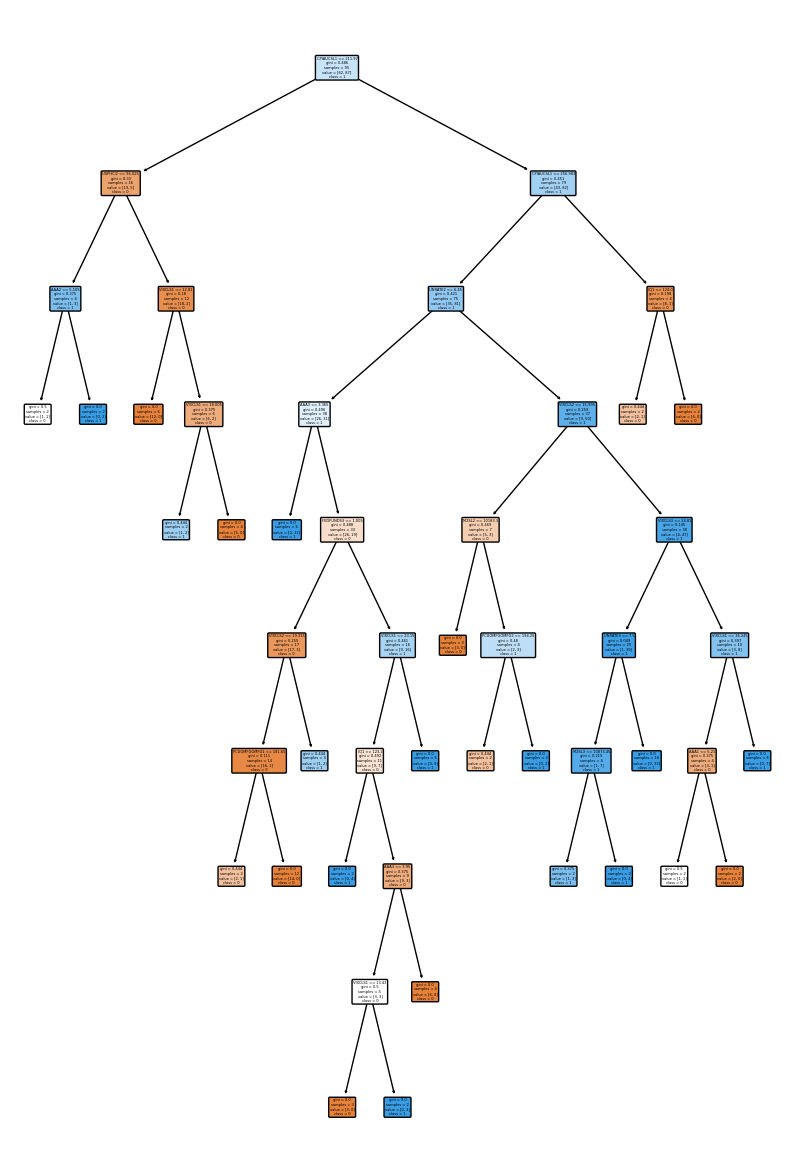

In [ ]:
from sklearn.tree import export_graphviz

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(10,15))
tree.plot_tree(estimator, # 학습한 모형
    feature_names = names, # 사용한 변수 이름
    class_names = ['0', '1'], # 예측할 타겟 클래스 이름
    # impurity=True,
    filled=True,
    rounded=True,
)
fig.savefig('output_prun.png')

In [ ]:
# X = df.iloc[:, 2:]


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# fig = plt.figure(figsize=(15, 10))
# plot_tree(rf_model.estimators_[0],
#           feature_names=X.columns,
#           class_names=df['FSI_UD'].unique(),
#           filled=True, rounded=True)

# plt.show()
# # 시각화해보았습니다다.

In [57]:
# Model Evaluation
print("Accuracy:", np.round(accuracy_score(y_true, y_pred), 4))
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred,
                                                               average='binary')
print("Precision: ", np.round(precision, 4))
print("Recall: ", np.round(recall, 2))
print("F-Score: ", np.round(fscore, 2))

Accuracy: 0.7368
Precision:  0.6923
Recall:  0.6
F-Score:  0.64


# Develop RF model by Parameter Tuning.
The accuracy of the default RF model was 0.59, which is too low. Therefore, I tried tuning the parameter of RF model as below.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# n_estimators = the number of decision trees
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_features = the number of features each decision tree takes into consideration
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1000, cv = 4, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
996 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
996 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [ ]:
# 베스트 파라미터
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [ ]:
y_pred = rf_random.predict(X_test)
y_true = Y_test

In [ ]:
# Model Evaluation
print("Accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred,
                                                               average='binary')
print("Precision: ", np.round(precision, 2))
print("Recall: ", np.round(recall, 2))
print("F-Score: ", np.round(fscore, 2))

#위에서 베스트트 파라미터로로 새로로 구해봤습니다다.

Accuracy: 0.74
Precision:  0.69
Recall:  0.6
F-Score:  0.64
